In [2]:
from random import randint
import numpy as np
import math as m
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [3]:
import statistics as st
from scipy.stats import moment

In [15]:
def set_grid(ax):
    ax.grid(True)
    ax.minorticks_on()
    ax.grid(which='minor')

# T2

![jupyter](https://raw.githubusercontent.com/Tokomeir/mat-stat/main/img/func_of_values.jpg)

In [6]:
chance = np.random.sample(25)
pool = np.sort(np.array([round((lambda x : np.log(1/(1-x)))(i),3) for i in chance]))
print("вариационный ряд - ", pool)

вариационный ряд -  [0.012 0.032 0.082 0.087 0.107 0.121 0.248 0.464 0.529 0.842 0.853 0.939
 1.278 1.304 1.389 1.465 1.466 1.637 1.646 1.815 1.862 1.957 1.988 2.249
 2.285]


### a)

In [8]:
print("размах - ", pool[-1] - pool[0])

размах -  2.273


In [9]:
print("медиана - ", pool[12])

медиана -  1.278


In [10]:
print("мода/моды - ", st.multimode(pool))

мода/моды -  [0.012, 0.032, 0.082, 0.087, 0.107, 0.121, 0.248, 0.464, 0.529, 0.842, 0.853, 0.939, 1.278, 1.304, 1.389, 1.465, 1.466, 1.637, 1.646, 1.815, 1.862, 1.957, 1.988, 2.249, 2.285]


In [11]:
print("коэффициент ассиметрии", moment(pool, 3) / np.power(moment(pool, 2), 1.5))

коэффициент ассиметрии -0.037177263873942344


### b)

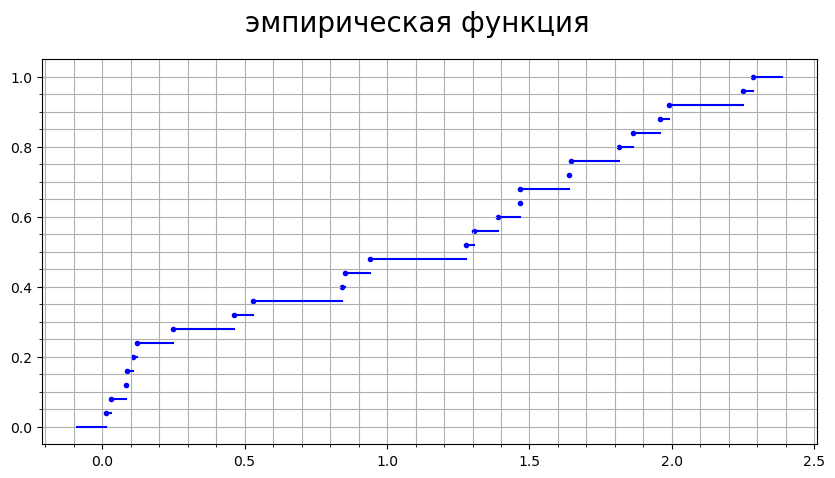

In [16]:
fig, ax = plt.subplots(1, figsize = (10, 5))
set_grid(ax)
fig.suptitle("эмпирическая функция", size = 20)
plt.plot([pool[0] - 0.1, pool[0]], [0,0], color = "blue")
for i in range(len(pool)-1):
    plt.plot(pool[i:i+2], [(i + 1) / len(pool)]*2, color = "blue")
plt.plot([pool[-1], pool[-1] + 0.1], [1,1], color = "blue")
plt.scatter(pool, [i / len(pool) for i in range(1, 26)], color = "blue", marker = '.')

In [17]:
h = list(np.histogram(pool))
h[0] = h[0] / len(pool)
h[0] = [h[0][i] / (h[1][i+1] - h[1][i]) for i in range(len(h[0]))]

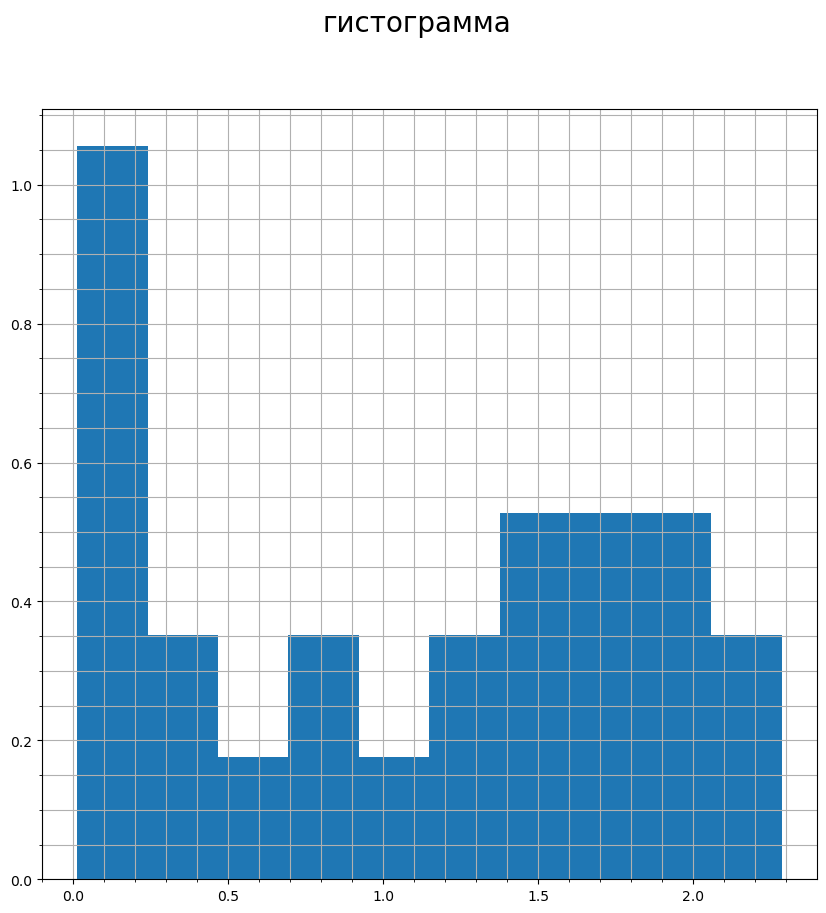

In [20]:
fig, ax = plt.subplots(1, figsize = (10, 10))
set_grid(ax)
fig.suptitle("гистограмма", size = 20)
plt.stairs(h[0], h[1], fill = 1)

{'whiskers': [<matplotlib.lines.Line2D at 0x2d2193d1f70>,
 'caps': [<matplotlib.lines.Line2D at 0x2d2193df550>,
 'boxes': [<matplotlib.lines.Line2D at 0x2d218db5c10>],
 'medians': [<matplotlib.lines.Line2D at 0x2d2193dfaf0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2d2193dfdc0>],
 'means': []}

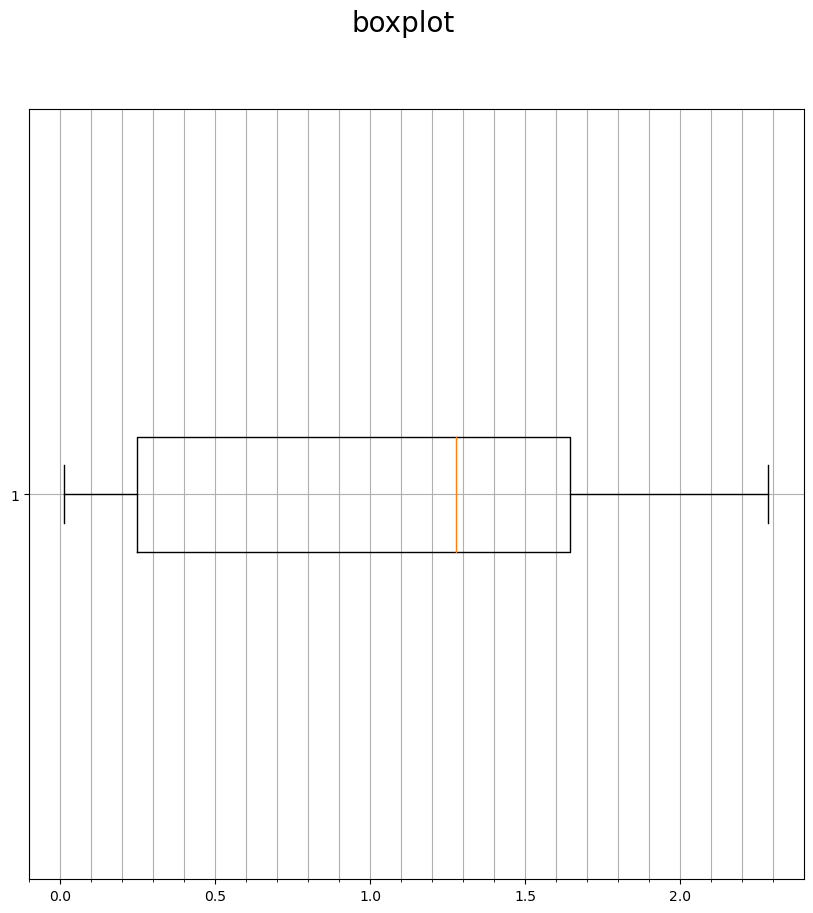

In [21]:
fig, ax = plt.subplots(1, figsize = (10, 10))
set_grid(ax)
fig.suptitle("boxplot", size = 20)
plt.boxplot(pool, vert = 0)

### c)

![jupyter](https://raw.githubusercontent.com/Tokomeir/mat-stat/main/img/part_c.jpg)

In [22]:
H = 2.344 * np.sqrt(25 / 24 * moment(pool, 2)) / 25**(1/5)

In [23]:
def q(l):
    return 3/4*(1 - l**2)
def dest(z):
    return 1/H/25 * sum([(q((z - i)/H) if q((z - i)/H) > 0 else 0) for i in pool])

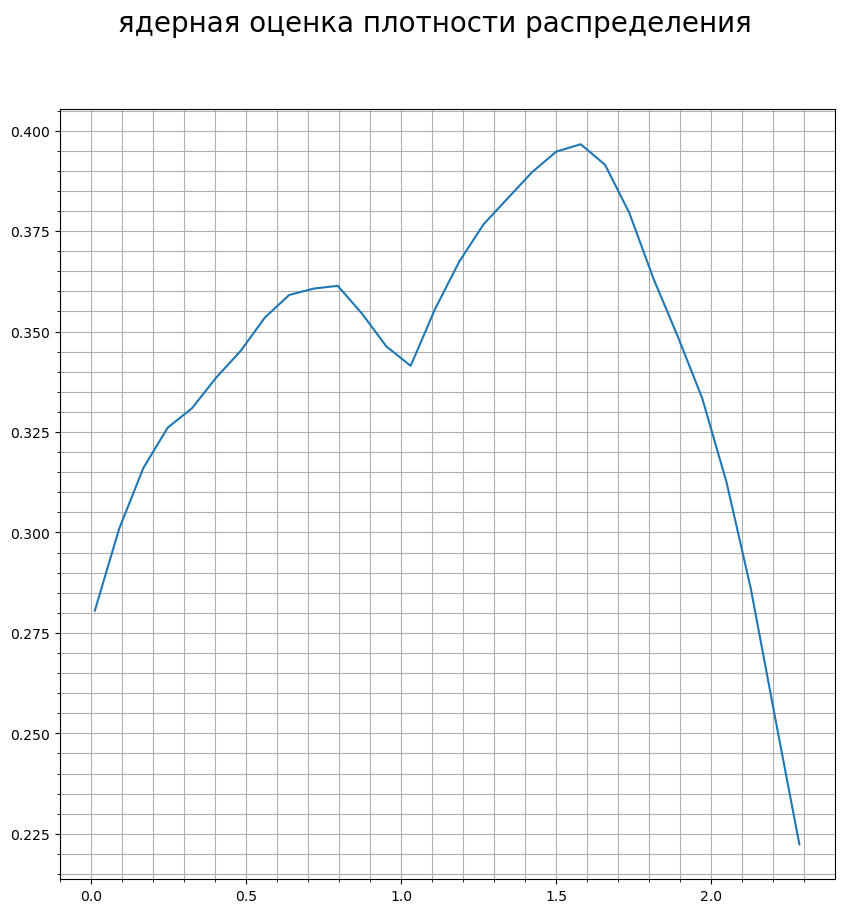

In [24]:
fig, ax = plt.subplots(1, figsize = (10, 10))
set_grid(ax)
fig.suptitle("ядерная оценка плотности распределения", size = 20)
plt.plot(np.linspace(pool[0], pool[-1], 30), [dest(i) for i in np.linspace(pool[0], pool[-1], 30)])

### d)

![jupyter](https://raw.githubusercontent.com/Tokomeir/mat-stat/main/img/part_d.jpg)

In [25]:
def gaus(x): # см тетрадь
    return 1/np.sqrt(2*np.pi*moment(pool, 2)/25)*np.exp(-(x - pool.mean())**2 / 2 / moment(pool, 2)*25)

In [28]:
def my_bootstrap(data, func, N):
    res = list()
    for i in range(N):
        redata = np.random.choice(data, len(data))
        res.append(func(redata))
    his = list(np.histogram(res))
    his[0] = his[0] / len(res)
    his[0] = [his[0][i] / (his[1][i+1] - his[1][i]) for i in range(len(his[0]))]
    plt.stairs(his[0], his[1], fill = 1)

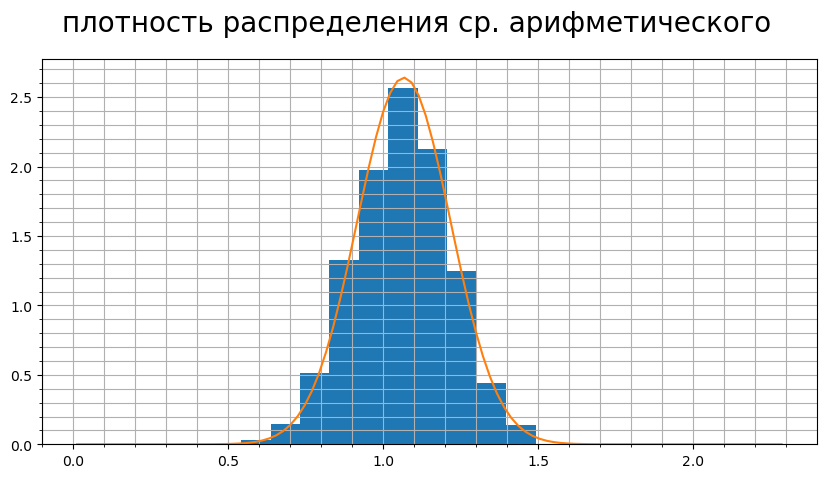

In [29]:
fig, ax = plt.subplots(1, figsize = (10, 5))
set_grid(ax)
fig.suptitle("плотность распределения ср. арифметического", size = 20)
my_bootstrap(pool, np.mean, 1000)
plt.plot(np.linspace(pool[0], pool[-1], 100), [gaus(i) for i in np.linspace(pool[0], pool[-1], 100)])

### e)

In [30]:
def calc_coef(data):
    return moment(data, 3) / np.power(moment(data, 2), 1.5)

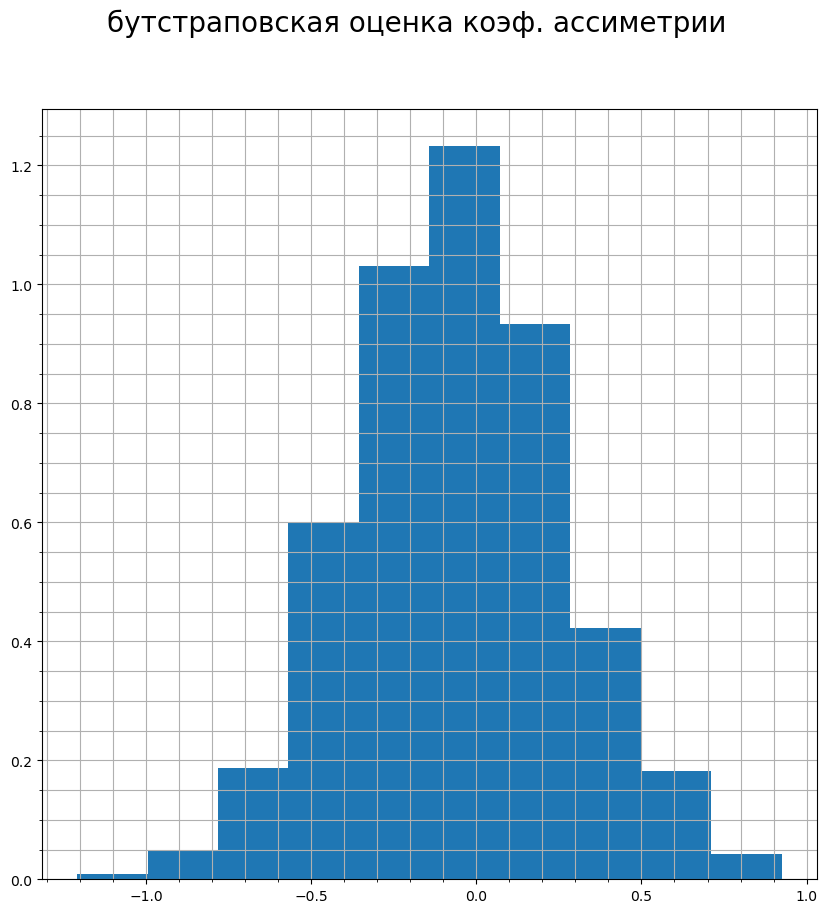

In [32]:
fig, ax = plt.subplots(1, figsize = (10, 10))
set_grid(ax)
fig.suptitle("бутстраповская оценка коэф. ассиметрии", size = 20)
my_bootstrap(pool, calc_coef, 1000)

### f)

![jupyter](https://raw.githubusercontent.com/Tokomeir/mat-stat/main/img/part_f.jpg)